<a href="https://colab.research.google.com/github/saha-indranil/ml-projects/blob/main/CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

!pip install -q gradio
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.4 MB/s eta 0:

# Import the data

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.


|Label|	Class|
|----|-----|
|0|	airplane|
|1|	automobile|
|2|	bird|
|3|	cat|
|4|	deer|
|5|	dog|
|6|	frog|
|7|	horse|
|8|	ship|
|9|	truck|



In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


# Preprocess the data

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
# First image of training set

X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
class_names=[ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

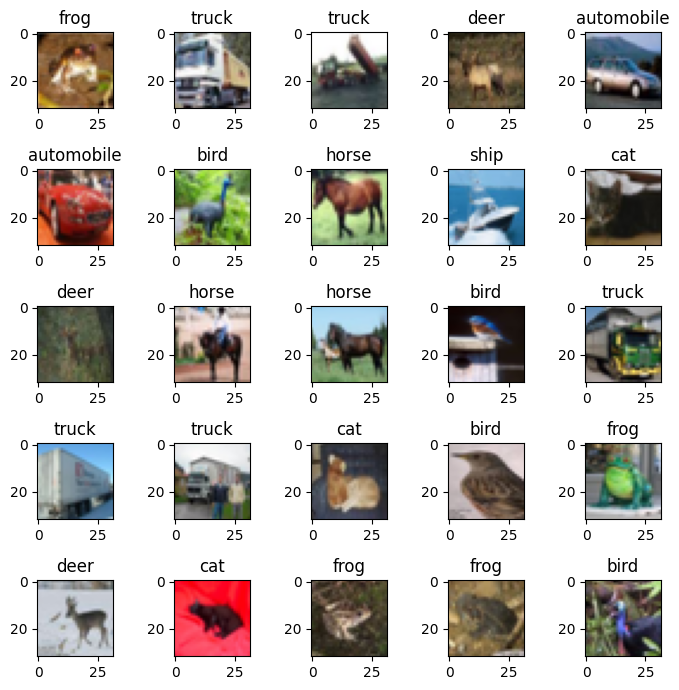

In [7]:
plt.rcParams['figure.figsize'] = (7,7)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])

plt.tight_layout()

In [8]:
X_train = X_train / 255
X_test = X_test / 255

# Build the model

In [9]:
model = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 27s 7ms/step - loss: 1.4372 - accuracy: 0.4839
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0935 - accuracy: 0.6186
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9641 - accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8769 - accuracy: 0.6973
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8116 - accuracy: 0.7190
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7546 - accuracy: 0.7403
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7025 - accuracy: 0.7581
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6583 - accuracy: 0.7731
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6211 - accuracy: 0.7840
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.58

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.9147 - accuracy: 0.7049 - 786ms/epoch - 3ms/step


# Verify predictions

In [12]:
y_pred = model.predict(X_test)
y_pred[:2]

313/313 [==============================] - 1s 2ms/step


array([[8.7070599e-05, 4.4392713e-05, 2.8488850e-05, 8.4727126e-01,
        3.8848873e-05, 9.7264815e-03, 3.0744656e-03, 7.2063216e-05,
        1.3894662e-01, 7.1029348e-04],
       [5.0110510e-03, 2.6587708e-02, 1.4171510e-06, 1.7617859e-07,
        2.5729805e-06, 2.8245754e-08, 2.2497156e-08, 8.6419398e-08,
        9.6825546e-01, 1.4156166e-04]], dtype=float32)

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

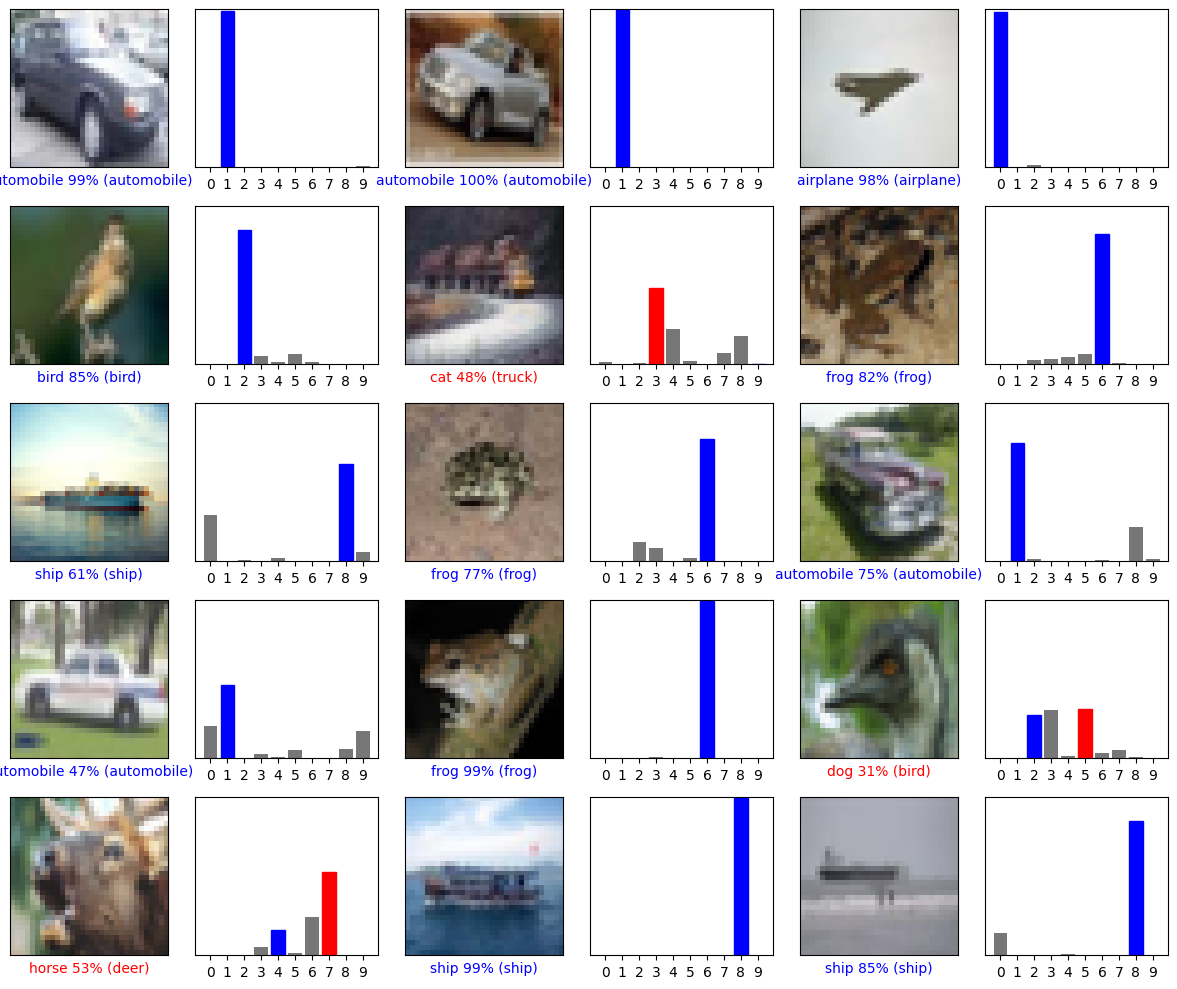

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  n = random.randint(0, len(X_test))
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(n, y_pred[n], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(n, y_pred[n], y_test)
plt.tight_layout()
plt.show()

# Deploy Model

In [18]:
def classify(image):
    image = image.resize((32, 32)) / 255.0
    prediction = model.predict(image)[0]
    return {str(i): prediction[i] for i in range(10)}

inputs = gr.inputs.Image(shape=(32, 32))
outputs = gr.outputs.Label(num_top_classes=3)
title = "CIFAR10 Image Classifier"
description = "Identify the object in an image from the CIFAR10 dataset."

demo = gr.Interface(fn=classify, inputs=inputs, outputs=outputs, title=title, description=description)
demo.launch(debug= True, share= True)

<ipython-input-18-1c284af18f8e>:6: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Image(shape=(32, 32))
<ipython-input-18-1c284af18f8e>:6: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Image(shape=(32, 32))
<ipython-input-18-1c284af18f8e>:7: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Label(num_top_classes=3)
<ipython-input-18-1c284af18f8e>:7: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  outputs = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://27bd035a63ccea8cd7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1431, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1103, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 707, in wrapper
    response = f(*args, **kwargs)
  Fi

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://27bd035a63ccea8cd7.gradio.live
